In [1]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits 
digits = load_digits()
fig, axes = plt.subplots(2, 5, figsize=(10, 5),subplot_kw={'xticks':(), 'yticks': ()}) 
for ax, img in zip(axes.ravel(), digits.images):  
    ax.imshow(img)

Text(0, 0.5, 'Second principal component')

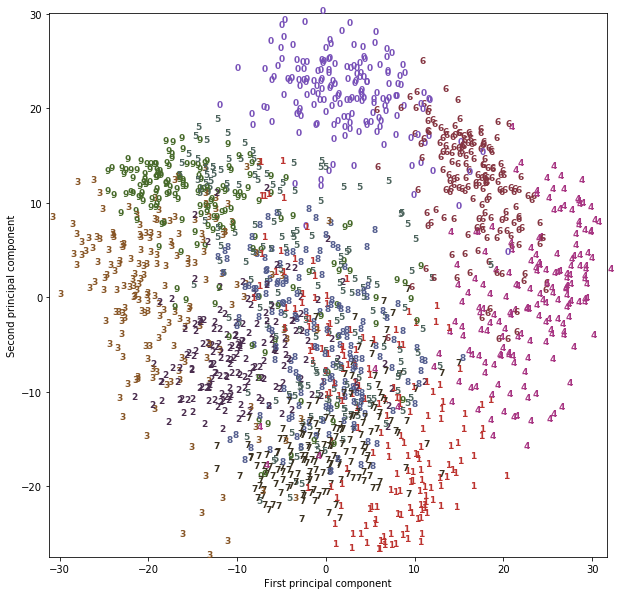

In [2]:
pca = PCA(n_components=2) 
pca.fit(digits.data) # transform the digits data onto the first two principal components 
digits_pca = pca.transform(digits.data)
colors = [ "#7851B8", "#BD3430", "#4A2D4E", "#875525","#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E","#476A2A"] 
plt.figure(figsize=(10, 10))
plt.xlim(digits_pca[:, 0].min(), digits_pca[:, 0].max())
plt.ylim(digits_pca[:, 1].min(), digits_pca[:, 1].max()) 
for i in range(len(digits.data)):    # actually plot the digits as text instead of using scatter    
    plt.text(digits_pca[i, 0], digits_pca[i, 1], str(digits.target[i]), color = colors[digits.target[i]], fontdict={'weight': 'bold', 'size': 9}) 
plt.xlabel("First principal component")
plt.ylabel("Second principal component") 


In [3]:
 # for reproducibility 
from numpy.random import seed
seed(1) 
import tensorflow as tf
tf.random.set_seed(1)

In [4]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation 
from tensorflow.keras.layers import Convolution2D, MaxPooling2D 
from tensorflow.keras.layers import Flatten
from tensorflow.keras.utils import to_categorical

In [5]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

In [6]:
print("test shape:{}\ntrain shape:{}".format(X_test.shape,X_train.shape))
X_train = X_train.reshape(60000, 28, 28, 1) 
X_test = X_test.reshape(10000, 28, 28, 1)
Y_train = to_categorical(Y_train, 10) 
Y_test = to_categorical(Y_test, 10)
print("afer reshape\ntest shape:{}\ntrain shape:{}".format(X_test.shape,X_train.shape))

test shape:(10000, 28, 28)
train shape:(60000, 28, 28)
afer reshape
test shape:(10000, 28, 28, 1)
train shape:(60000, 28, 28, 1)


In [79]:
#model
model = Sequential([
    Convolution2D(filters=18,kernel_size=(3, 3),input_shape=(28, 28, 1)),
    # first conv layer    
    Activation('relu'),    
    Convolution2D(filters=18,kernel_size=(3, 3)),  
    # second conv layer    
    Activation('relu'),    
    MaxPooling2D(pool_size=(2, 2)),  
    # max pooling layer    
    Flatten(),  
    # flatten the output tensor   
    Dense(64),  
    # fully-connected hidden layer
    Activation('relu'),   
    Dense(10),  
    # output layer   
    Activation('softmax')])

In [80]:

print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 18)        180       
_________________________________________________________________
activation_4 (Activation)    (None, 26, 26, 18)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 18)        2934      
_________________________________________________________________
activation_5 (Activation)    (None, 24, 24, 18)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 18)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 2592)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [81]:

model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adadelta')
# Directory where the checkpoints will be saved


In [107]:
import os
checkpoint_dir = './training_checkpoints'
# Name of the checkpoint files
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt_{epoch}")

checkpoint_callback=tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_prefix,
    save_weights_only=True)
history=model.fit(X_train, Y_train, batch_size=100, epochs=20, validation_split=0.1, verbose=1,callbacks=[checkpoint_callback])

Train on 54000 samples, validate on 6000 samples
Epoch 1/20
54000/54000 [==============================] - 30s 562us/sample - loss: 3.9698 - accuracy: 0.6991 - val_loss: 3.9940 - val_accuracy: 0.7062
Epoch 2/20
54000/54000 [==============================] - 33s 613us/sample - loss: 3.9433 - accuracy: 0.7024 - val_loss: 3.9728 - val_accuracy: 0.7087
Epoch 3/20
54000/54000 [==============================] - 33s 618us/sample - loss: 3.9187 - accuracy: 0.7052 - val_loss: 3.9563 - val_accuracy: 0.7108
Epoch 4/20
54000/54000 [==============================] - 34s 628us/sample - loss: 3.8964 - accuracy: 0.7081 - val_loss: 3.9407 - val_accuracy: 0.7118
Epoch 5/20
54000/54000 [==============================] - 34s 633us/sample - loss: 3.8760 - accuracy: 0.7107 - val_loss: 3.9243 - val_accuracy: 0.7132
Epoch 6/20
54000/54000 [==============================] - 35s 650us/sample - loss: 3.8572 - accuracy: 0.7127 - val_loss: 3.9103 - val_accuracy: 0.7145
Epoch 7/20
54000/54000 [=====================

<Figure size 432x288 with 0 Axes>

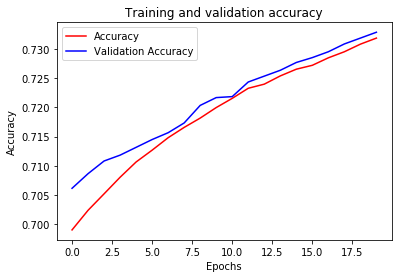

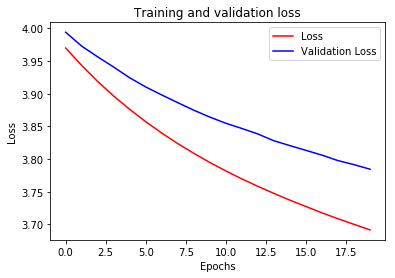

<Figure size 432x288 with 0 Axes>

In [108]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(len(acc)) # Get number of epochs\n",
plt.plot(epochs, acc, 'r')
plt.plot(epochs, val_acc, 'b')
plt.title('Training and validation accuracy')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Accuracy", "Validation Accuracy"])
plt.figure()
plt.plot(epochs, loss, 'r')
plt.plot(epochs, val_loss, 'b')
plt.title('Training and validation loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss", "Validation Loss"])
plt.figure()

<PIL.Image.Image image mode=RGB size=28x28 at 0x295598769E8>
intial dimension: (264, 296, 3)


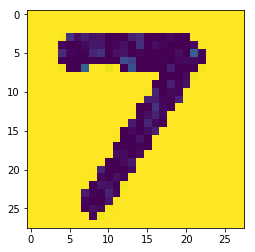

gray image dimension: (28, 28)


In [110]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from PIL import Image
path_to_png_file	=	r"C:\Users\xlassix\Pictures\digit (7).jpg"# directory
def get_image(path,dimension):
    i=Image.open(path)
    z=i.resize(dimension)
    print(z)
    i = np.asarray(z)

    #	wherever	your	image	is 
    import	matplotlib.image	as	mpimg 
    img	=	mpimg.imread(path_to_png_file)
    print("intial dimension:",img.shape)

    #convert to gray
    img_gray=np.mean(i,axis=2,dtype=np.uint)
    plt.figure()
    plt.imshow(img_gray)
    plt.show()
    return img_gray
img_gray=get_image(path_to_png_file,(28,28))

print("gray image dimension:",img_gray.shape)

In [111]:
score = model.evaluate(X_test, Y_test, verbose=1) 
print('Test accuracy:', score[1])

10000/10000 [==============================] - 1s 140us/sample - loss: 3.7160 - accuracy: 0.7320
Test accuracy: 0.732


[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


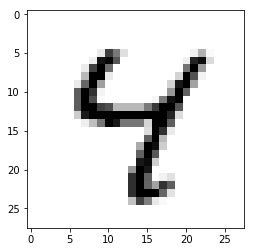

In [112]:
test=6
y=X_test[test].reshape(1,28,28,1)
print(Y_test[test])
model.predict(y)
y=y.reshape(28,28)
plt.figure()
plt.imshow(y,cmap=cm.gray_r)
plt.show()


In [113]:
model.predict(img_gray.reshape(1,28,28,1))

array([[1.06084495e-10, 5.69625108e-32, 1.75150031e-30, 9.92098927e-01,
        4.94873105e-03, 4.10352863e-04, 2.54192832e-03, 5.98763673e-32,
        7.81438109e-11, 6.96650453e-17]], dtype=float32)

In [114]:
def conv(image,im_filter,padding=False):
    if padding==True:
        image = np.pad(image,(1,1), 'constant')
    #compute dimesions of image
    height,width=image.shape
    #output image size init with zero
    out_image=np.zeros((height-len(im_filter) +1,width-len(im_filter)+1))
    
    #calcuating the out_image
    for row in range(len(out_image)):
        for col in range(len(out_image[0])):
            #apply filter
            for i in range(len(im_filter)):
                for j in range(len(im_filter[0])):
                    out_image[row,col]+=image[row+i,col+j]*im_filter[i][j]
    #fix cumulative that exceed 255
    out_image[out_image>255]=255
    out_image[out_image<0]=0
    
    #plotting image
    plt.figure()
    plt.imshow(image,cmap=cm.gray_r)
    plt.show()
    
    #plotting out_image
    plt.figure()
    plt.imshow(out_image,cmap=cm.gray)
    plt.show()
    return out_image

<PIL.Image.Image image mode=RGB size=30x30 at 0x29559B26F98>
intial dimension: (264, 296, 3)


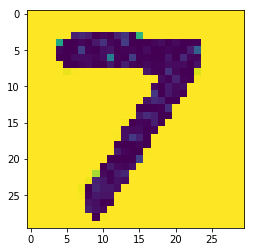

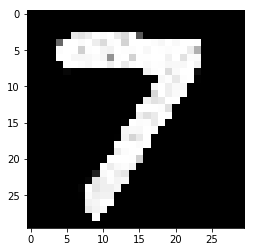

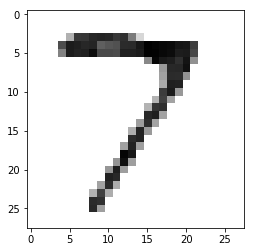

(28, 28)
3 predicted with 1.0probablity
3 predicted with 0.9920989274978638probablity


(1, 28, 28, 1)

In [115]:
out=conv(get_image(path_to_png_file,(30,30)),[[0.5,0.5,0.5],[0.5,0.5,0.5],[0.5,0.5,0.5]])
print(out.shape)
out=out.reshape(1,28,28,1)
m=model.predict(out)
prob,pred=max([i for i in zip(*[i for i in m],range(0,10))])
img_gray=img_gray.reshape(1,28,28,1)
n=model.predict(img_gray)
print("{} predicted with {}probablity".format(pred,prob))
prob,pred=max([i for i in zip(*[i for i in n],range(0,10))])

print("{} predicted with {}probablity".format(pred,prob))
img_gray.shape


In [72]:
tf.train.latest_checkpoint(checkpoint_dir)
 

'./training_checkpoints\\ckpt_1'